# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,427,86,38,89,176,59,9,169,39,20,132,190,428,148,67,7,33,193,202
1,197,82,44,72,150,64,7,154,44,19,144,181,350,177,80,0,16,183,187
2,157,93,42,70,131,56,7,127,53,18,145,156,240,152,74,5,4,189,190
3,324,94,38,88,179,60,7,170,39,21,131,188,435,144,66,2,28,195,204
4,38,106,53,98,176,54,10,216,31,24,171,235,691,218,74,1,9,187,197
5,411,78,36,51,116,56,4,120,57,17,124,135,209,135,84,1,12,177,184
6,544,88,43,70,177,74,19,152,44,19,143,180,342,168,76,1,9,186,189
7,579,84,38,66,138,62,6,126,54,18,132,144,232,139,70,4,7,185,190
8,321,113,57,109,194,56,6,260,26,28,175,288,982,261,85,11,21,182,183
9,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,423.020036,93.555556,44.788707,81.526412,168.007286,61.735883,8.564663,167.963570,41.156648,20.517304,147.876138,188.029144,435.344262,174.775956,72.670310,6.289617,12.387978,188.786885,195.409836
std,240.663805,8.330267,6.153376,15.518465,33.562285,8.127710,4.833912,33.270547,7.761327,2.598106,14.533599,31.168588,177.421042,32.473556,7.256174,5.001268,9.126080,6.127011,7.558143
min,0.000000,76.000000,33.000000,40.000000,110.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,177.000000,181.000000
25%,216.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,318.000000,150.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,427.000000,92.000000,44.000000,78.000000,166.000000,61.000000,8.000000,155.000000,43.000000,19.000000,146.000000,177.000000,357.000000,173.000000,72.000000,5.000000,11.000000,188.000000,197.000000
75%,626.000000,100.000000,49.000000,96.000000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,217.000000,578.000000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,110.000000,322.000000,133.000000,55.000000,262.000000,61.000000,28.000000,188.000000,288.000000,998.000000,268.000000,119.000000,22.000000,41.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Признаки имеют сильно разный масштаб, поэтому отнормируем данные с помощью StandartScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
np.unique(y_train, return_counts=True)

(array(['bus', 'opel', 'saab', 'van'], dtype=object),
 array([154, 119, 146, 130]))

Классы сбалансированы, поэтому взвешивать их не будем.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500
)

params = {
    'penalty': ['l1', 'l2'],
    'C': [1000, 500, 250, 100, 50]
}

gs = GridSearchCV(
    estimator=log_reg,
    param_grid=params,
    scoring='f1_macro'
)

In [ ]:
gs.fit(X_train, y_train)
print(f"Best params: {gs.best_params_}")

Best params: {'C': 250, 'penalty': 'l2'}


In [ ]:
log_reg_opt = LogisticRegressionCV(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500,
    Cs=gs.best_params_['C'],
    penalty=gs.best_params_['penalty'],
    cv=10
)

In [ ]:
log_reg_opt.fit(X_train, y_train)

LogisticRegressionCV(Cs=250, cv=10, max_iter=500, multi_class='multinomial',
                     solver='saga', tol=0.001)

In [ ]:
def score(estimator, title=''):
    if title:
        print(title, '\n')

    preds_train = estimator.predict(X_train)
    preds_test = estimator.predict(X_test)

    print("f1-score")
    print(f"Train: {round(f1_score(y_train, preds_train, average='macro'), 5)}")
    print(f"Test: {round(f1_score(y_test, preds_test, average='macro'), 5)}")
    print("----------")
    print("Accuracy")
    print(f"Train: {round(accuracy_score(y_train, preds_train), 5)}")
    print(f"Test: {round(accuracy_score(y_test, preds_test), 5)}")

In [ ]:
score(log_reg_opt, title='Optimal Logistic Regression')

Optimal Logistic Regression 

f1-score
Train: 0.8466
Test: 0.79656
----------
Accuracy
Train: 0.84699
Test: 0.79125


In [ ]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

! pip install scikit-plot

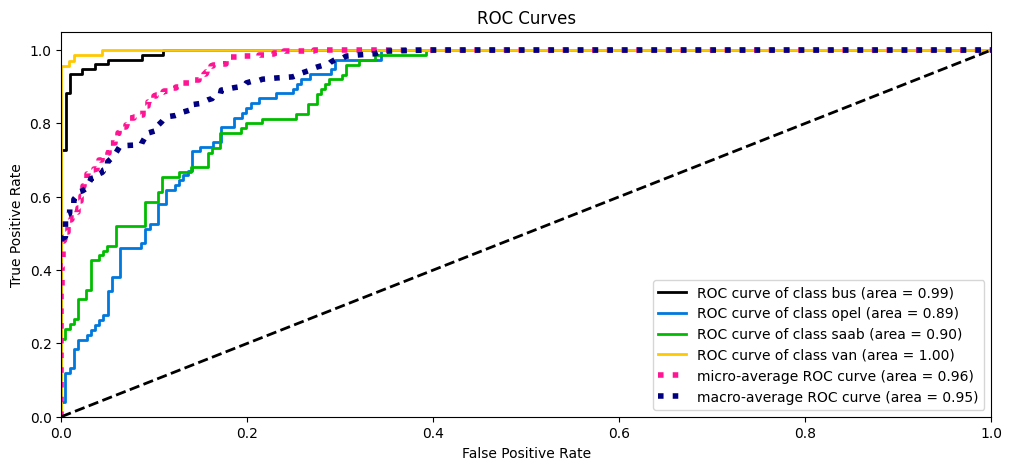

In [ ]:
from scikitplot.metrics import plot_roc

y_probas = log_reg_opt.predict_proba(X_test)
plot_roc(y_test, y_probas, figsize=(12, 5))
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

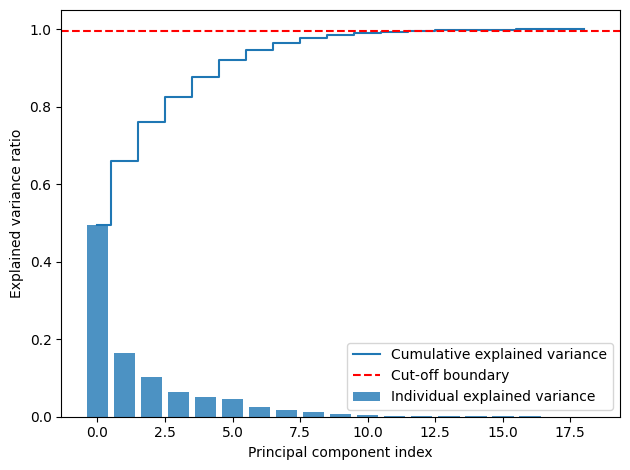

In [ ]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.8, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')

bound = 0.995
plt.axhline (y=bound, color='red', linestyle='--', label='Сut-off boundary')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
num_comp = 0
for i, val in enumerate(cum_sum_eigenvalues):
    if val > bound:
        print(f'Explained variance ratio: {bound}')
        num_comp = i
        print(f'Selected number of components: {i}')
        break

Explained variance ratio: 0.995
Selected number of components: 12


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Перед использованием PCA обязательно нужно нормировать данные, ведь нас интересуют относительные дисперсии, а не абсолютные. Нормировка уже сделана выше.

In [ ]:
pca = PCA(n_components=num_comp)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
log_reg_pca = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500
)

params = {
    'penalty': ['l1', 'l2'],
    'C': [500, 250, 100, 50]
}

gs_pca = GridSearchCV(
    estimator=log_reg,
    param_grid=params,
    scoring='f1_macro'
)

gs_pca.fit(X_train_pca, y_train)
print(f"Best params: {gs_pca.best_params_}")

log_reg_pca_opt = LogisticRegressionCV(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500,
    Cs=gs_pca.best_params_['C'],
    penalty=gs_pca.best_params_['penalty'],
    cv=10
)

log_reg_pca_opt.fit(X_train_pca, y_train)

Best params: {'C': 500, 'penalty': 'l2'}


LogisticRegressionCV(Cs=500, cv=10, max_iter=500, multi_class='multinomial',
                     solver='saga', tol=0.001)

In [ ]:
preds_train_pca = log_reg_pca_opt.predict(X_train_pca)
preds_test_pca = log_reg_pca_opt.predict(X_test_pca)

print(f'Optimal Logistic Regression with PCA (n_comp={num_comp}) \n')
print("f1-score")
print(f"Train: {round(f1_score(y_train, preds_train_pca, average='macro'), 5)}")
print(f"Test: {round(f1_score(y_test, preds_test_pca, average='macro'), 5)}")
print("----------")
print("Accuracy")
print(f"Train: {round(accuracy_score(y_train, preds_train_pca), 5)}")
print(f"Test: {round(accuracy_score(y_test, preds_test_pca), 5)}")

Optimal Logistic Regression with PCA (n_comp=12) 

f1-score
Train: 0.75132
Test: 0.73915
----------
Accuracy
Train: 0.7541
Test: 0.74074


Потеряв чуть больше половины данных, мы потеряли 5-10% точности.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Подберем не только оптимальную глубину, но и некоторые другие параметры.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(5,12)],
    'min_samples_split': [i for i in range(2,10)],
    'min_samples_leaf': [i for i in range(1,5)]
}

gs = GridSearchCV(
    estimator=tree,
    param_grid=params,
    scoring='accuracy',
    cv=10
)

gs.fit(X_train_pca, y_train)
print(f"Best params: {gs.best_params_}")

Best params: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [ ]:
tree_opt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=11,
    min_samples_leaf=2,
    min_samples_split=3
)
tree_opt.fit(X_train_pca, y_train)

preds_train_pca = tree_opt.predict(X_train_pca)
preds_test_pca = tree_opt.predict(X_test_pca)

print(f'Decision tree opt with PCA \n')
print("f1-score")
print(f"Train: {round(f1_score(y_train, preds_train_pca, average='macro'), 5)}")
print(f"Test: {round(f1_score(y_test, preds_test_pca, average='macro'), 5)}")
print("----------")
print("Accuracy")
print(f"Train: {round(accuracy_score(y_train, preds_train_pca), 5)}")
print(f"Test: {round(accuracy_score(y_test, preds_test_pca), 5)}")

Decision tree opt with PCA 

f1-score
Train: 0.92707
Test: 0.61289
----------
Accuracy
Train: 0.92714
Test: 0.59259


Глубина 11, разумеется, велика, но обобщающая способность такого дерева сохраняется за счет регуляризаций (min_samples_leaf, min_samples_split).

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

Чтобы избежать переобучения дерева, мы накладываем различные регуляризации на него: глубина, число объектов в листьях и прочее. Когда речь идет об ансамбле деревьев, им можно дать большую свободу $-$ переобучение отдельного дерева ничего критичного не несет, в среднем ансамбль способен показывать высокую обобщающую способность.

Поэтому при использовании ансамбля ослабим регуляризации. С логистической регрессией подобных эффектов нет, ее мы просто оставим в покое.

In [ ]:
from collections import Counter

def _bootstrap(X, y):
    n = X.shape[0]
    idxs = np.random.choice(range(0, n), n, replace=True)
    return X[idxs], y[idxs]

def _aggregate_predictions(preds):
    final_preds = []
    n = preds.shape[1]
    for i in range(n):
        col = preds[:, i]
        ans = Counter(col).most_common(1)[0][0]
        final_preds.append(ans)
    return np.array(final_preds)

def _create_model(estimator):
    if estimator == DecisionTreeClassifier:
        return DecisionTreeClassifier(
            max_depth=16,
            min_samples_leaf=1,
            min_samples_split=2
        )
    elif estimator == LogisticRegressionCV:
        return LogisticRegressionCV(
            multi_class='multinomial',
            solver='saga',
            tol=1e-3,
            max_iter=500,
            cv=3
        )
    else:
        print('Unknown model family')

def ensemble_predict(N, estimator):
    preds = []
    for i in range(N):
        model = _create_model(estimator)
        X, y = _bootstrap(X_train, y_train)
        model.fit(X, y)
        preds_i = model.predict(X_test)
        preds.append(preds_i)
    return _aggregate_predictions(np.array(preds))

def ensemble_score(preds):
    return round(f1_score(y_test, preds, average='macro'), 5), round(accuracy_score(y_test, preds), 5)

In [ ]:
N_min, N_max = 2, 100
N_s = list(range(N_min, N_max, 5))

f1_logr, acc_logr = [], []
f1_tree, acc_tree = [], []

for N in N_s:
    pr_tree = ensemble_predict(N, DecisionTreeClassifier)
    f1_t, acc_t = ensemble_score(pr_tree)
    f1_tree.append(f1_t)
    acc_tree.append(acc_t)

    pr_logr = ensemble_predict(N, LogisticRegressionCV)
    f1_l, acc_l = ensemble_score(pr_logr)
    f1_logr.append(f1_l)
    acc_logr.append(acc_l)

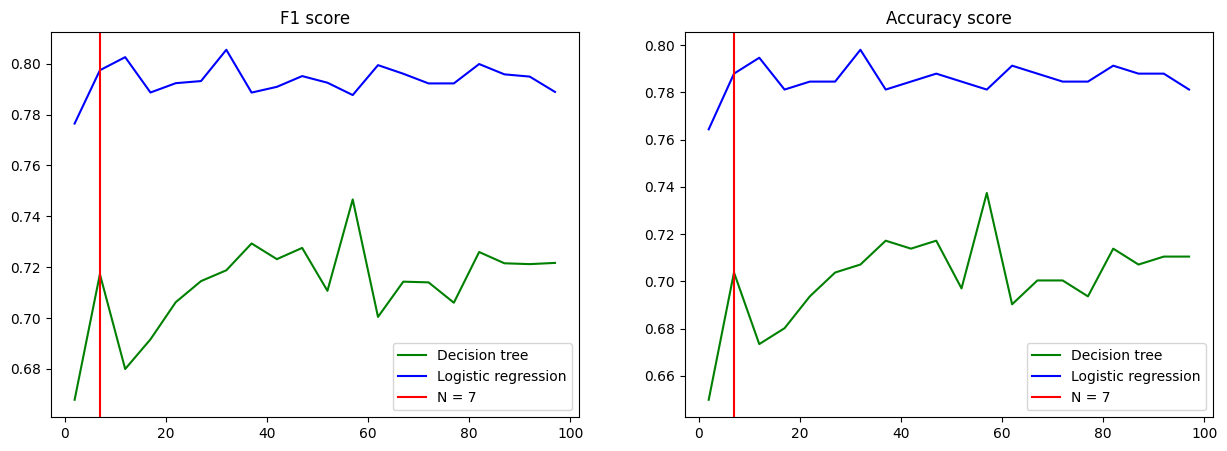

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(N_s, f1_tree, color='green', label='Decision tree')
axs[0].plot(N_s, f1_logr, color='blue', label='Logistic regression')
axs[0].axvline(x=7, color='red', label='N = 7')
axs[0].set_title('F1 score')
axs[0].legend()

axs[1].plot(N_s, acc_tree, color='green', label='Decision tree')
axs[1].plot(N_s, acc_logr, color='blue', label='Logistic regression')
axs[1].axvline(x=7, color='red', label='N = 7')
axs[1].set_title('Accuracy score')
axs[1].legend()

plt.show()

Основные поинты:

1. Бэггинг не меняет bias, но снижает varience, поэтому особенно эффективен для моделей с сильной дисперсией. В нашем эксперименте бэггинг практически не сказался на качестве предсказания логистической регрессии: как было около 80%, так и осталось. При этом точность предсказания деревьев выросла на 10-12%.

2. Уменьшение разброса ответов, конечно, хорошо, но начиная с некоторого момента уменьшение этой ошибки почти не сказывается на качестве предсказания $-$ куда больший вклад в ошибку дает смещение и шум. При этом увеличение числа базовых моделей в ансамбле негативно сказывается на потребляемых ресурсах.

3. В эксперименте наблюдается следующее: обе модели показывают рост точности с ростом $N$, но это справедливо лишь для малых $N$, дальше начинаются колебания вокруг некоторого среднего. Я бы выбрал за оптимальное число  $N = 7$, потому что оно весьма невелико и показывает ощутимый прирост качества по сравнению с $N = 1$.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

Для начала найдем оптимальную глубину деревьев.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
for depth in range(3, 15):
    forest = RandomForestClassifier(max_depth=depth)
    forest.fit(X_train, y_train)
    preds = forest.predict(X_test)
    print(f'depth = {depth}:')
    f1, acc = round(f1_score(y_test, preds, average='macro'), 5), round(accuracy_score(y_test, preds), 5)
    print(f'f1 = {f1}, accuracy = {acc}')

depth = 3:
f1 = 0.629, accuracy = 0.6633
depth = 4:
f1 = 0.6511, accuracy = 0.68013
depth = 5:
f1 = 0.66136, accuracy = 0.68687
depth = 6:
f1 = 0.70305, accuracy = 0.72054
depth = 7:
f1 = 0.70345, accuracy = 0.72054
depth = 8:
f1 = 0.69394, accuracy = 0.71044
depth = 9:
f1 = 0.68833, accuracy = 0.7037
depth = 10:
f1 = 0.68871, accuracy = 0.70707
depth = 11:
f1 = 0.72279, accuracy = 0.73737
depth = 12:
f1 = 0.71389, accuracy = 0.73064
depth = 13:
f1 = 0.6953, accuracy = 0.71044
depth = 14:
f1 = 0.67405, accuracy = 0.6936


Лучший результат показала depth=11. Теперь переберм число деревьев в лесу. Для большей стабильности проведем эксперимент $N=10$ раз и усредним результаты.

In [ ]:
num_trees = list(range(2, 101, 2))
opt_depth = 11
f1_scores_avg, acc_scores_avg = [0 for i in range(len(num_trees))], [0 for i in range(len(num_trees))]

N = 10
for k in range(N):
    for i, num in enumerate(num_trees):
        forest = RandomForestClassifier(max_depth=opt_depth, n_estimators=num)
        forest.fit(X_train, y_train)
        preds = forest.predict(X_test)
        f1, acc = f1_score(y_test, preds, average='macro'), accuracy_score(y_test, preds)
        f1_scores_avg[i] += f1 / N
        acc_scores_avg[i] += acc / N

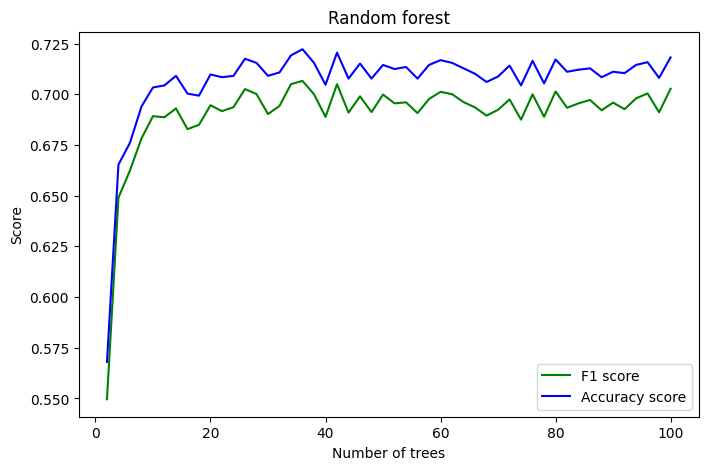

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(8, 5))

axs.plot(num_trees, f1_scores_avg, color='green', label='F1 score')
axs.plot(num_trees, acc_scores_avg, color='blue', label='Accuracy score')
axs.legend()

plt.xlabel('Number of trees')
plt.ylabel('Score')
plt.title('Random forest')
plt.show()

Видим, что после 30-40 деревьев качество не улучшается.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [ ]:
bounds = [round(k) for k in np.linspace(X_train.shape[0]/10, X_train.shape[0], 10)]
f1_tree, acc_tree = [0] * 10, [0] * 10
f1_forest, acc_forest = [0] * 10, [0] * 10
f1_lr, acc_lr = [0] * 10, [0] * 10

N = 50
for _ in range(N):
    for i in range(10):

            idxs = np.random.choice(range(0, X_train.shape[0]), bounds[i], replace=True)

            lr = LogisticRegression(
                multi_class='multinomial',
                solver='saga',
                tol=1e-3,
                max_iter=500
            )
            lr.fit(X_train[idxs], y_train[idxs])
            pred_lr = lr.predict(X_test)
            a, b = f1_score(y_test, pred_lr, average='macro'), accuracy_score(y_test, pred_lr)
            f1_lr[i] += a / N
            acc_lr[i] += b / N

            tree = DecisionTreeClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=3)
            tree.fit(X_train[idxs], y_train[idxs])
            pred_tree = tree.predict(X_test)
            a, b = f1_score(y_test, pred_tree, average='macro'), accuracy_score(y_test, pred_tree)
            f1_tree[i] += a / N
            acc_tree[i] += b / N

            forest = RandomForestClassifier(max_depth=11, n_estimators=40)
            forest.fit(X_train[idxs], y_train[idxs])
            pred_forest = forest.predict(X_test)
            a, b = f1_score(y_test, pred_forest, average='macro'), accuracy_score(y_test, pred_forest)
            f1_forest[i] += a / N
            acc_forest[i] += b / N

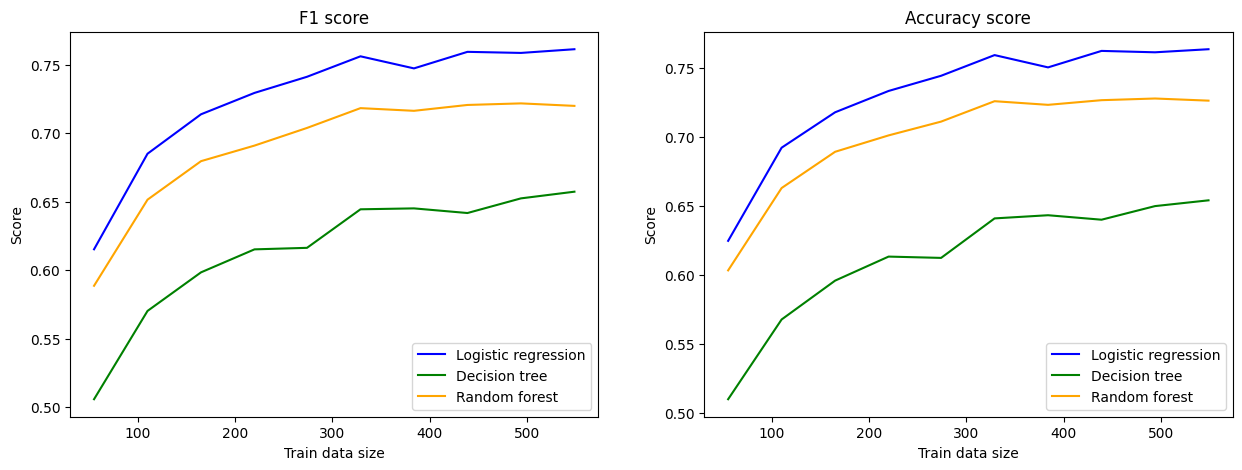

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(bounds, f1_lr, color='blue', label='Logistic regression')
axs[0].plot(bounds, f1_tree, color='green', label='Decision tree')
axs[0].plot(bounds, f1_forest, color='orange', label='Random forest')
axs[0].set_xlabel('Train data size')
axs[0].set_ylabel('Score')
axs[0].set_title('F1 score')
axs[0].legend()

axs[1].plot(bounds, acc_lr, color='blue', label='Logistic regression')
axs[1].plot(bounds, acc_tree, color='green', label='Decision tree')
axs[1].plot(bounds, acc_forest, color='orange', label='Random forest')
axs[1].set_xlabel('Train data size')
axs[1].set_ylabel('Score')
axs[1].set_title('Accuracy score')
axs[1].legend()

plt.show()

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

catboost_basic = CatBoostClassifier(
    n_estimators=100,
    max_depth=3,
    verbose=0
)

catboost_basic.fit(X_train, y_train)
score(catboost_basic)

f1-score
Train: 0.98373
Test: 0.77919
----------
Accuracy
Train: 0.98361
Test: 0.78114


Найдем оптимальные параметры с помощью Grid Search. Для начала определимся с числом деревьев и их глубиной.

In [ ]:
params = {
    'depth': [3, 4],
    'n_estimators': [200, 250, 300, 400, 500, 600, 700]
}

catboost_model = CatBoostClassifier(
    verbose=0
)

gs_cb = GridSearchCV(
    estimator=catboost_model,
    param_grid=params,
    scoring='accuracy',
    cv=3
)

gs_cb.fit(X_train, y_train)
print('Best parameters: ', gs_cb.best_params_)

catboost_first = CatBoostClassifier(
    n_estimators=gs_cb.best_params_['n_estimators'],
    depth=gs_cb.best_params_['depth'],
    verbose=0
)
catboost_first.fit(X_train, y_train)
score(catboost_first, '1st GS iteration')

Best parameters:  {'depth': 4, 'n_estimators': 500}
1st GS iteration 

f1-score
Train: 1.0
Test: 0.8035
----------
Accuracy
Train: 1.0
Test: 0.80471


Попробуем дотюнить с помощью изменения коэффициента регуляризации и агрессивности бэггинга.

In [ ]:
params = {
    'l2_leaf_reg': [2.2, 2.4, 2.6, 2.8, 3.0],
    'bagging_temperature': [1.0, 1.1, 1.2, 1.3]

}

catboost_model = CatBoostClassifier(
    n_estimators=500,
    depth=4,
    learning_rate=1,
    verbose=0
)

gs_cb = GridSearchCV(
    estimator=catboost_model,
    param_grid=params,
    scoring='accuracy',
    cv=3
)

gs_cb.fit(X_train, y_train)
print('Best parameters: ', gs_cb.best_params_)

Best parameters:  {'bagging_temperature': 1.2, 'l2_leaf_reg': 2.6}


In [ ]:
catboost_opt = CatBoostClassifier(
    n_estimators=500,
    depth=4,
    learning_rate=1,
    l2_leaf_reg=2.4,
    bagging_temperature=1.2,
    verbose=0
)
catboost_opt.fit(X_train, y_train)
score(catboost_opt, 'Catboost with optimal parameters')

Catboost with optimal parameters 

f1-score
Train: 1.0
Test: 0.81673
----------
Accuracy
Train: 1.0
Test: 0.81818


Бустинг показал наибольшую точность среди всех рассмотренных в этой лабораторной работе методов.